In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('graduation.csv')
df.head()

,Year,Zone_EN,Coordinates,School_Type_EN,School_Stage_EN,Gender_EN,Unnamed: 6,LocalFlag_EN,Number of Failed students,Number of Pass students,Total Number of Students,Graduation %
0,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Female,NaN,Expat,8,243,251,96.81%
1,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Female,NaN,Local,20,353,373,94.64%
2,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Male,NaN,Expat,28,182,210,86.67%
3,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Male,NaN,Local,23,262,285,91.93%
4,2015,Ajman,"25.244000,55.266140",Private Schools,Cycle 3,Female,NaN,Expat,11,424,435,97.47%


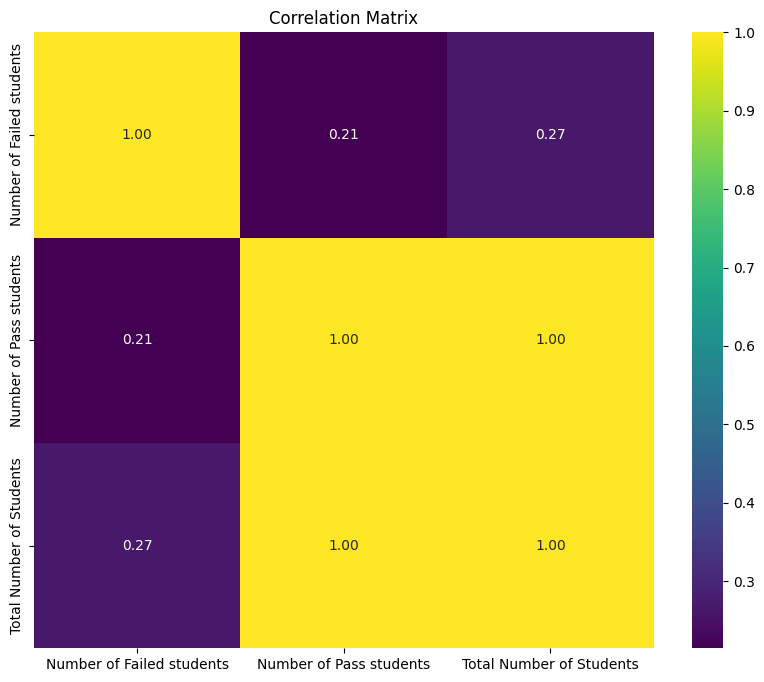

In [3]:
numerical_cols = ['Number of Failed students', 'Number of Pass students', 'Total Number of Students', 'Graduation %']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

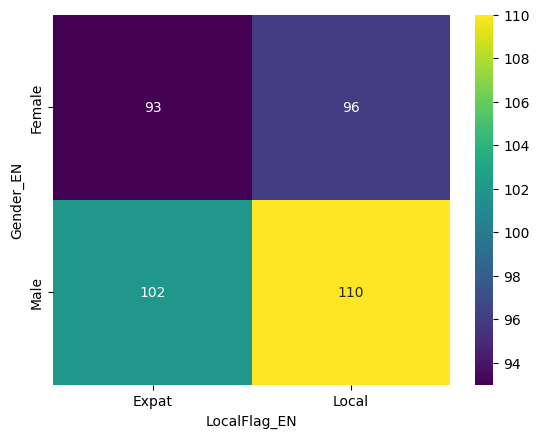

In [4]:
frequency_table1 = pd.crosstab(df['Gender_EN'], df['LocalFlag_EN'])

sns.heatmap(frequency_table1, cmap='viridis', annot=True, fmt='d')
plt.show()

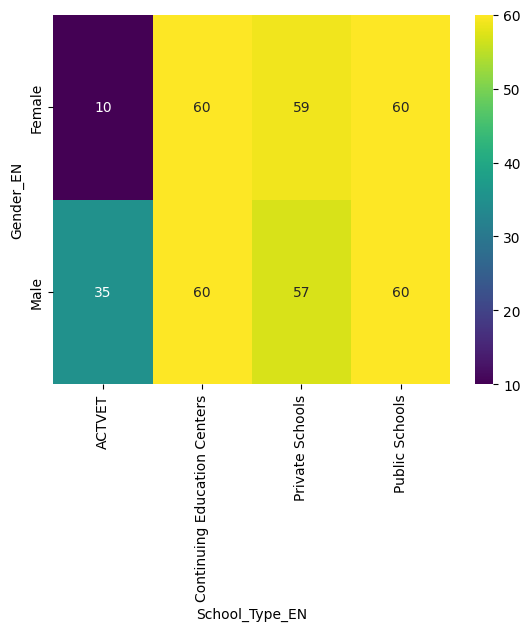

In [5]:
frequency_table2 = pd.crosstab(df['Gender_EN'], df['School_Type_EN'])

sns.heatmap(frequency_table2, cmap='viridis', annot=True, fmt='d')
plt.show()

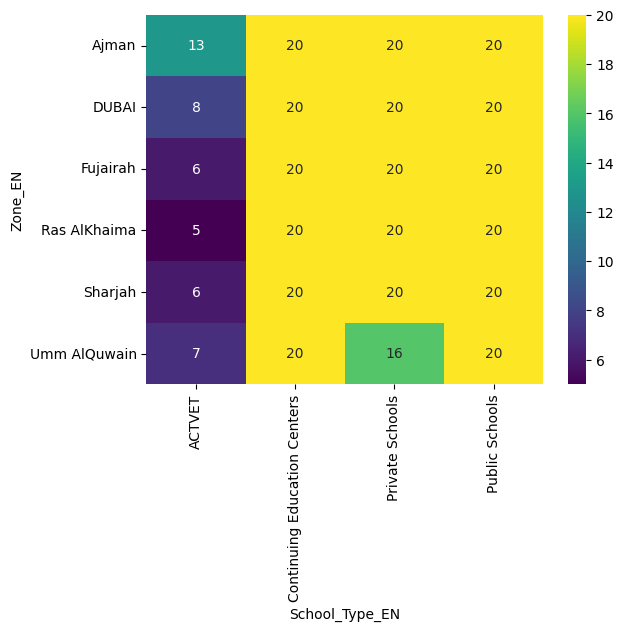

In [6]:
frequency_table3 = pd.crosstab(df['Zone_EN'], df['School_Type_EN'])

sns.heatmap(frequency_table3, cmap='viridis', annot=True, fmt='d')
plt.show()

In [8]:
df['Graduation %'] = df['Graduation %'].str.rstrip('%').astype(float)

scatter_3d = px.scatter_3d(df, x='School_Type_EN', y='Gender_EN', z='Total Number of Students', color='Graduation %', size='Graduation %',
                           title='Graduation Percentage by School Type, Gender, and Number of Students',
                           category_orders={"School_Type_EN": ["Public Schools", "Private Schools"],
                                            "Gender_EN": ["Female", "Male"]})
scatter_3d.show()

In [9]:
sunburst_chart = px.sunburst(df, path=['Zone_EN', 'School_Type_EN', 'Gender_EN'], values='Graduation %',
                             title='Hierarchical View of Graduation Percentage by Zone, School Type, and Gender')

sunburst_chart.show()

In [10]:
box_plot_advanced = px.box(df, x='School_Type_EN', y='Graduation %', color='Gender_EN',
                           title='Graduation Percentage Distribution by School Type and Gender',
                           category_orders={"School_Type_EN": ["Public Schools", "Private Schools"],
                                            "Gender_EN": ["Female", "Male"]})
box_plot_advanced.show()

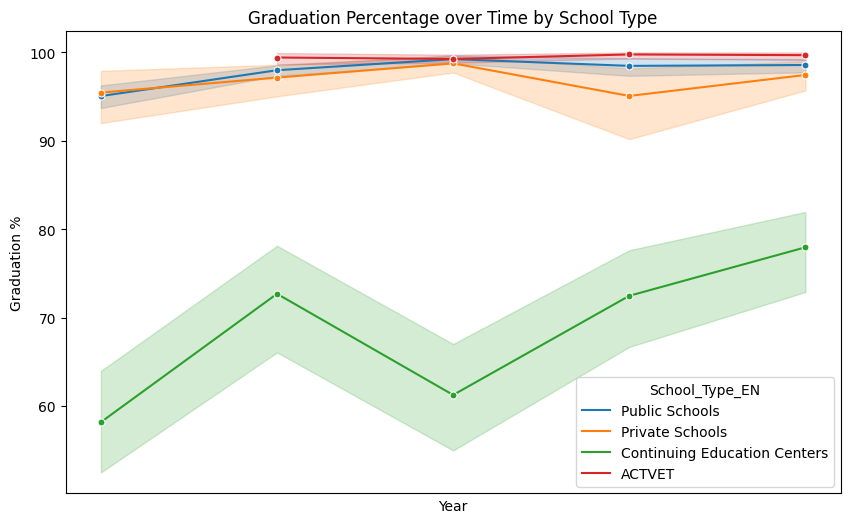

In [11]:
#time series analysis
df['Year'] = pd.to_datetime(df['Year'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Graduation %', hue='School_Type_EN', marker='o', markersize=5)
plt.title('Graduation Percentage over Time by School Type')
plt.xticks(rotation=45)
plt.show()

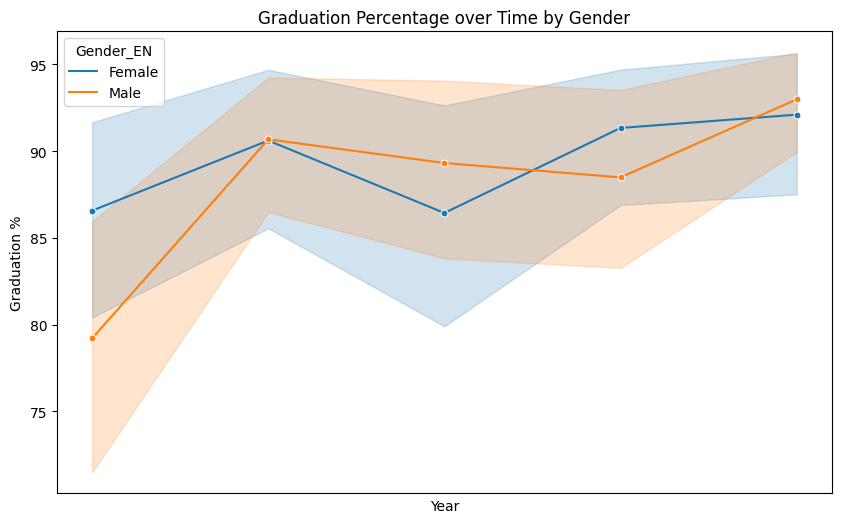

In [12]:
df['Year'] = pd.to_datetime(df['Year'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Graduation %', hue='Gender_EN', marker='o', markersize=5)
plt.title('Graduation Percentage over Time by Gender')
plt.xticks(rotation=45)
plt.show()

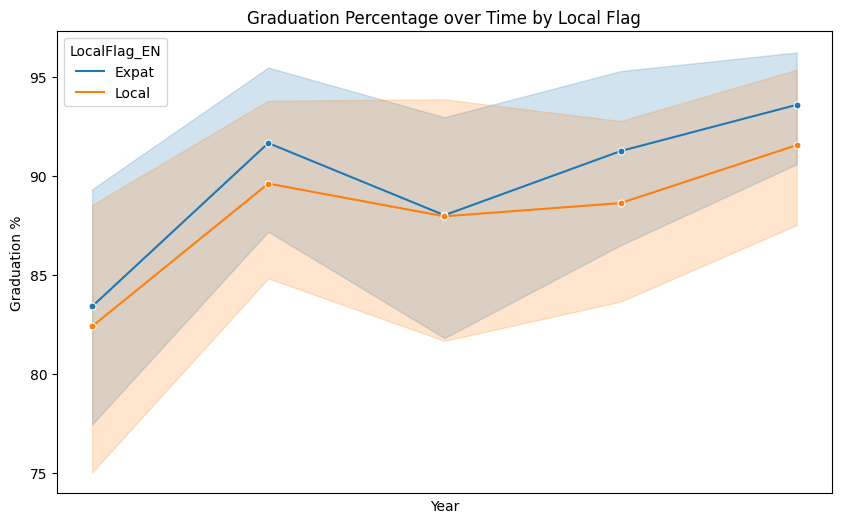

In [13]:
df['Year'] = pd.to_datetime(df['Year'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Graduation %', hue='LocalFlag_EN', marker='o', markersize=5)
plt.title('Graduation Percentage over Time by Local Flag')
plt.xticks(rotation=45)
plt.show()

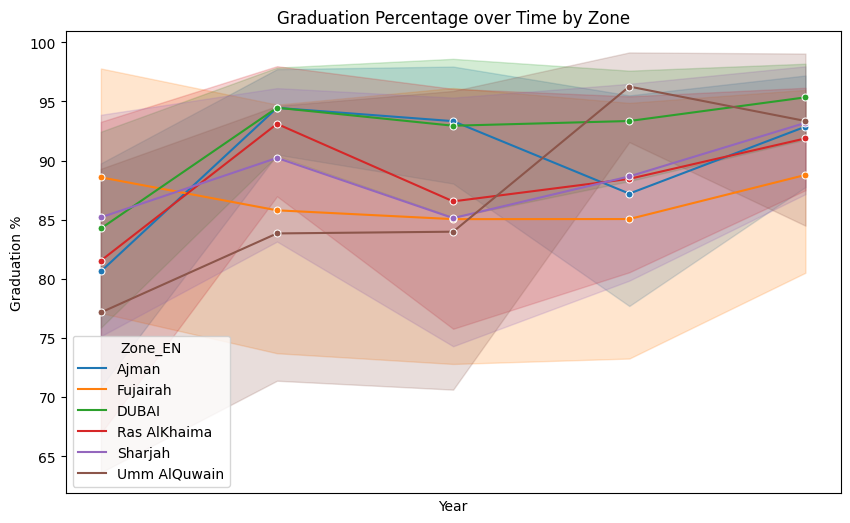

In [14]:
df['Year'] = pd.to_datetime(df['Year'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Graduation %', hue='Zone_EN', marker='o', markersize=5)
plt.title('Graduation Percentage over Time by Zone')
plt.xticks(rotation=45)
plt.show()

In [15]:
import scipy.stats as stats

#ANOVA for 'Graduation %' with respect to 'School_Type_EN'
anova_school_type = stats.f_oneway(*(df[df['School_Type_EN'] == school_type]['Graduation %'] for school_type in df['School_Type_EN'].unique()))
print("ANOVA for Graduation % and School_Type_EN:")
print("F-Statistic:", anova_school_type.statistic)
print("P-Value:", anova_school_type.pvalue)


#ANOVA for 'Graduation %' with respect to 'Gender_EN'
anova_gender = stats.f_oneway(*(df[df['Gender_EN'] == gender]['Graduation %'] for gender in df['Gender_EN'].unique()))
print("\nANOVA for Graduation % and Gender_EN:")
print("F-Statistic:", anova_gender.statistic)
print("P-Value:", anova_gender.pvalue)


#ANOVA for 'Graduation %' with respect to 'LocalFlag_EN'
anova_local_flag = stats.f_oneway(*(df[df['LocalFlag_EN'] == flag]['Graduation %'] for flag in df['LocalFlag_EN'].unique()))
print("\nANOVA for Graduation % and LocalFlag_EN:")
print("F-Statistic:", anova_local_flag.statistic)
print("P-Value:", anova_local_flag.pvalue)

ANOVA for Graduation % and School_Type_EN:
F-Statistic: 267.6037013468309
P-Value: 5.908148791138887e-95

ANOVA for Graduation % and Gender_EN:
F-Statistic: 0.336154931669194
P-Value: 0.5623843541509919

ANOVA for Graduation % and LocalFlag_EN:
F-Statistic: 0.9274679025579637
P-Value: 0.3361050403099025
